<a href="https://colab.research.google.com/github/Jordan-A-G-Henry/Machine-Learning-Projects/blob/main/Classification_Task_Jordan_Henry_11_2_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initial Preparation of the Data for Classification:**

It is often helpful in these initial steps to parse them out into multiple cells, in order to be familiar with the data you are are working with.

In [54]:
import pandas as pd
import numpy as np

data = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_RSEM_42cases.txt', sep='\t',header=(0))
data

,ID,TCGA_DD_A1EC_01A,TCGA_ES_A2HT_01A,TCGA_DD_A3A8_01A,TCGA_DD_A1EL_01A,TCGA_DD_A3A3_01A,TCGA_EP_A3RK_01A,TCGA_DD_A11D_01A,TCGA_DD_A39X_01A,TCGA_DD_A11C_01A,...,TCGA_BC_A110_01A,TCGA_EP_A12J_01A,TCGA_EP_A26S_01A,TCGA_FV_A23B_01A,TCGA_DD_A39V_01A,TCGA_DD_A39W_01A,TCGA_DD_A3A2_01A,TCGA_FV_A2QR_01A,TCGA_DD_A3A4_01A,TCGA_FV_A3I1_01A
0,a100130426,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,a100133144,9.2,0.00,2.00,8.00,3.15,3.31,2.26,3.75,11.18,...,0.0,14.61,11.42,48.06,3.96,1.67,4.23,0.00,0.00,7.73
2,a100134869,8.8,3.00,0.00,5.00,1.85,8.69,3.74,6.25,10.82,...,3.0,9.39,1.58,67.94,2.04,3.33,5.77,0.00,7.00,13.27
3,a10357,144.0,104.55,196.73,614.74,54.87,160.63,69.86,225.26,167.17,...,65.9,180.51,286.78,303.27,126.07,216.06,128.60,224.42,116.57,155.17
4,a10431,2545.0,2044.00,1579.00,4455.00,1069.00,2219.00,762.00,2707.00,1348.00,...,1205.0,1499.00,1545.00,1572.00,1354.00,1626.00,1635.00,1937.00,1873.00,1658.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYX7791,12725.0,5090.00,1877.00,3098.00,2584.00,6402.00,4185.00,6012.00,4425.00,...,7735.0,1616.00,2000.00,6540.00,4873.00,1098.00,5560.00,9525.00,381.00,13617.00
20527,ZZEF123140,4548.0,963.00,836.00,2076.00,182.00,1243.00,316.00,1181.00,1175.00,...,258.0,1680.00,2129.00,1542.00,417.00,1300.00,1069.00,1024.00,501.00,1016.00
20528,ZZZ326009,1494.0,271.00,547.00,1780.00,284.00,763.00,358.00,343.00,1342.00,...,284.0,1589.00,1717.00,1768.00,306.00,1219.00,817.00,988.00,985.00,1072.00
20529,psiTPTE22387590,8.0,4.00,1.00,14.00,0.00,10.00,2.00,3.00,11.00,...,3.0,18.00,11.00,2.00,4.00,2.00,2.00,7.00,12.00,1.00


The first issue is that the data does not seem to come with actual classes indicated, in the first row. This is a problem, given that this is the information we would be using to test the accuracy of our model. Upon reviewing the instructions, the reasoning why becomes fairly clear. In this dataframe, columns represent individuals, with rows representing genes/features. Each individual is represented (in a separate dataframe) with a number of labels. Eg. Ethnicity, Cancer Stage, Obesity etc. Thus, these individuals could be classified in a variety of ways, depending on  the researchers intent.

In [55]:
clinicals = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/TCGA_43_clinical.csv', sep=',',header=(0))
clinicals

,Variable,Status,race,gender,pathologic_stage,ObesityClass1
0,TCGA-BC-A10R-01A-11R-A131-07,Dead,WHITE,FEMALE,[Not Available],---
1,TCGA-BC-A10W-01A-11R-A131-07,Dead,ASIAN,MALE,[Not Available],---
2,TCGA-BC-A10X-01A-11R-A131-07,Dead,WHITE,FEMALE,Stage IIIA,---
3,TCGA-EP-A12J-01A-11R-A131-07,Alive,BLACK OR AFRICAN AMERICAN,MALE,Stage I,---
4,TCGA-FV-A23B-01A-11R-A16W-07,Dead,WHITE,FEMALE,Stage II,---
5,TCGA-BC-A10U-01A-11R-A131-07,Dead,WHITE,MALE,[Not Available],---
6,TCGA-BC-A10Z-01A-11R-A131-07,Dead,WHITE,FEMALE,Stage I,---
7,TCGA-BC-A10T-01A-11R-A131-07,Dead,WHITE,MALE,[Not Available],---
8,TCGA-FV-A2QR-01A-11R-A213-07,Dead,WHITE,MALE,Stage I,---
9,TCGA-FV-A3I1-01A-11R-A22L-07,Dead,WHITE,FEMALE,Stage II,---


For this simple exercise, I'm interested in classifying via cancer stage. The interesting decision to me is whether or not to include those for whom information is unavailable in the classification, or to remove those samples, for fear that they'll lead to (confusion in my decision trees). The logic here is that individuals in this category are likely a heterogenous group.

In [56]:
# Remove unwanted columns.
clinicals = clinicals.drop(labels = ['Status','race', 'gender', 'ObesityClass1'], axis = 1)
#Transpose, to mirror organization of the 'data' df.
clinicalsT = clinicals.transpose()

#clinicalsT

#Make it so that the column headings are the same, in preparation for merging the two.
columns = clinicalsT.iloc[0]
clinicalsT = clinicalsT[1:]
clinicalsT.columns = columns

clinicalsT.columns.name = 'ID'

clinicalsT

ID,TCGA-BC-A10R-01A-11R-A131-07,TCGA-BC-A10W-01A-11R-A131-07,TCGA-BC-A10X-01A-11R-A131-07,TCGA-EP-A12J-01A-11R-A131-07,TCGA-FV-A23B-01A-11R-A16W-07,TCGA-BC-A10U-01A-11R-A131-07,TCGA-BC-A10Z-01A-11R-A131-07,TCGA-BC-A10T-01A-11R-A131-07,TCGA-FV-A2QR-01A-11R-A213-07,TCGA-FV-A3I1-01A-11R-A22L-07,...,TCGA-DD-A3A3-01A-11R-A22L-07,TCGA-DD-A118-01A-11R-A131-07,TCGA-BD-A3EP-01A-11R-A22L-07,TCGA-DD-A11A-01A-11R-A131-07,TCGA-DD-A3A2-01A-11R-A213-07,TCGA-DD-A11D-01A-11R-A131-07,TCGA-DD-A1EG-01A-11R-A213-07,TCGA-BC-A10Y-01A-11R-A131-07,TCGA-DD-A1EJ-01A-11R-A155-07,TCGA-DD-A39V-01A-11R-A213-07
pathologic_stage,[Not Available],[Not Available],Stage IIIA,Stage I,Stage II,[Not Available],Stage I,[Not Available],Stage I,Stage II,...,Stage I,Stage II,Stage I,Stage I,Stage I,Stage I,Stage I,[Not Available],Stage IIIC,Stage II


In [57]:
clinicalsT = clinicalsT.sort_index(axis=1)
clinicalsT

ID,TCGA-BC-A10R-01A-11R-A131-07,TCGA-BC-A10T-01A-11R-A131-07,TCGA-BC-A10U-01A-11R-A131-07,TCGA-BC-A10W-01A-11R-A131-07,TCGA-BC-A10X-01A-11R-A131-07,TCGA-BC-A10Y-01A-11R-A131-07,TCGA-BC-A10Z-01A-11R-A131-07,TCGA-BC-A110-01A-11R-A131-07,TCGA-BC-A216-01A-11R-A155-07,TCGA-BD-A2L6-01A-11R-A213-07,...,TCGA-DD-A3A8-01A-11R-A22L-07,TCGA-EP-A12J-01A-11R-A131-07,TCGA-EP-A26S-01A-11R-A16W-07,TCGA-EP-A3RK-01A-11R-A22L-07,TCGA-ES-A2HT-01A-12R-A180-07,TCGA-FV-A23B-01A-11R-A16W-07,TCGA-FV-A2QR-01A-11R-A213-07,TCGA-FV-A3I1-01A-11R-A22L-07,TCGA-FV-A3R2-01A-11R-A22L-07,TCGA-G3-A3CH-01A-11R-A22L-07
pathologic_stage,[Not Available],[Not Available],[Not Available],[Not Available],Stage IIIA,[Not Available],Stage I,[Not Available],Stage IIIA,[Not Available],...,Stage II,Stage I,Stage I,Stage IIIA,Stage I,Stage II,Stage I,Stage II,Stage I,Stage IIIA


In [58]:
check1 = set(clinicalsT.columns)
check2 = set(data.columns)
check = check1.union(check2)
len(check)

86

len(check) =!= 43. This set is larger than it should be, indicating duplicates. The problem here is that the columns IDs are different. Thus, trying to merge the two dataframes based on these column names won't work. On the other hand, the do seem to refer to the same individuals, which is good. It implies that if sorted alphabetically (as done here), the two should line up correctly.

In [59]:
#Our list of features here represents the genes about which which we've collected RNASeq data for each individual.
features = data.iloc[0:, 0].values
features
#len(features)

array(['a100130426', 'a100133144', 'a100134869', ..., 'ZZZ326009',
       'psiTPTE22387590', 'tAKR389932'], dtype=object)

In [60]:
data=data.drop(['ID'], axis = 1) 
dataT = np.transpose(data)
dataT

,0,1,2,3,4,5,6,7,8,9,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
TCGA_DD_A1EC_01A,0.00,9.20,8.80,144.00,2545.0,0.0,253.0,0.0,0.0,0.0,...,54.0,1196.0,1635.0,2.0,2220.0,12725.0,4548.0,1494.0,8.0,1.0
TCGA_ES_A2HT_01A,0.00,0.00,3.00,104.55,2044.0,0.0,54.0,0.0,0.0,0.0,...,30.0,470.0,690.0,8.0,490.0,5090.0,963.0,271.0,4.0,33.0
TCGA_DD_A3A8_01A,0.00,2.00,0.00,196.73,1579.0,0.0,161.0,0.0,0.0,0.0,...,24.0,251.0,1039.0,41.0,1930.0,1877.0,836.0,547.0,1.0,206.0
TCGA_DD_A1EL_01A,0.00,8.00,5.00,614.74,4455.0,0.0,437.0,1.0,0.0,0.0,...,87.0,815.0,2717.0,110.0,2877.0,3098.0,2076.0,1780.0,14.0,247.0
TCGA_DD_A3A3_01A,0.00,3.15,1.85,54.87,1069.0,0.0,113.0,0.0,0.0,0.0,...,11.0,212.0,627.0,7.0,554.0,2584.0,182.0,284.0,0.0,8.0
TCGA_EP_A3RK_01A,0.00,3.31,8.69,160.63,2219.0,0.0,107.0,0.0,0.0,0.0,...,62.0,1037.0,1394.0,1.0,1489.0,6402.0,1243.0,763.0,10.0,87.0
TCGA_DD_A11D_01A,0.00,2.26,3.74,69.86,762.0,0.0,36.0,0.0,0.0,0.0,...,31.0,315.0,723.0,21.0,1222.0,4185.0,316.0,358.0,2.0,74.0
TCGA_DD_A39X_01A,0.00,3.75,6.25,225.26,2707.0,0.0,98.0,0.0,0.0,0.0,...,27.0,602.0,1832.0,25.0,880.0,6012.0,1181.0,343.0,3.0,588.0
TCGA_DD_A11C_01A,0.00,11.18,10.82,167.17,1348.0,0.0,39.0,0.0,3.0,0.0,...,93.0,3202.0,2057.0,4.0,3657.0,4425.0,1175.0,1342.0,11.0,107.0
TCGA_DD_A11B_01A,0.00,12.91,4.09,229.61,1975.0,0.0,73.0,0.0,0.0,0.0,...,51.0,627.0,1471.0,16.0,1533.0,4591.0,2312.0,877.0,5.0,150.0


Now that our data has been transposed, rows now samples/individuals and columns now represent features. We can now more easily sort the dataframe by row, and thus finally create a dataframe which is properly labelled. Simply by utilizing the fact that the sample name is now the index for both datframes. 

In [61]:
dataT = dataT.sort_index()
dataT

,0,1,2,3,4,5,6,7,8,9,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
TCGA_BC_A10R_01A,0.00,0.00,11.00,172.29,2174.0,0.0,303.0,1.0,0.0,0.0,...,79.0,1004.0,2365.0,12.0,2169.0,10916.0,1044.0,1364.0,34.0,7.0
TCGA_BC_A10T_01A,0.00,23.67,12.33,214.55,3161.0,0.0,344.0,0.0,2.0,0.0,...,111.0,864.0,2076.0,1.0,2562.0,5257.0,1572.0,1552.0,9.0,47.0
TCGA_BC_A10U_01A,0.00,13.21,8.79,160.45,2234.0,0.0,563.0,0.0,5.0,0.0,...,96.0,3449.0,1918.0,42.0,2401.0,11737.0,774.0,2139.0,2.0,183.0
TCGA_BC_A10W_01A,0.00,15.07,8.93,324.71,3084.0,0.0,296.0,0.0,0.0,0.0,...,116.0,1103.0,2934.0,376.0,6504.0,10431.0,2921.0,5655.0,7.0,9.0
TCGA_BC_A10X_01A,0.00,1.33,3.67,225.54,2202.0,0.0,62.0,0.0,0.0,0.0,...,100.0,1299.0,1880.0,62.0,3382.0,4889.0,1105.0,1150.0,14.0,99.0
TCGA_BC_A10Y_01A,0.00,20.12,7.88,369.28,2020.0,0.0,197.0,0.0,1.0,0.0,...,99.0,3095.0,2539.0,98.0,1605.0,10232.0,841.0,1604.0,10.0,126.0
TCGA_BC_A10Z_01A,1.04,3.58,4.42,231.89,2937.0,0.0,484.0,0.0,1.0,0.0,...,46.0,1461.0,3919.0,85.0,2594.0,3327.0,1716.0,1969.0,33.0,198.0
TCGA_BC_A110_01A,0.00,0.00,3.00,65.90,1205.0,0.0,59.0,0.0,0.0,0.0,...,20.0,494.0,621.0,12.0,592.0,7735.0,258.0,284.0,3.0,34.0
TCGA_BC_A216_01A,0.00,10.00,0.00,324.96,1938.0,0.0,556.0,1.0,0.0,0.0,...,49.0,2668.0,2471.0,520.0,3485.0,6807.0,2733.0,1927.0,12.0,3.0
TCGA_BD_A2L6_01A,0.00,3.57,1.43,420.91,2682.0,0.0,85.0,0.0,0.0,0.0,...,31.0,2241.0,1600.0,87.0,2287.0,8070.0,659.0,1166.0,21.0,271.0


In [62]:
#For continuity
clinicals = clinicalsT.transpose()
clinicals

,pathologic_stage
ID,
TCGA-BC-A10R-01A-11R-A131-07,[Not Available]
TCGA-BC-A10T-01A-11R-A131-07,[Not Available]
TCGA-BC-A10U-01A-11R-A131-07,[Not Available]
TCGA-BC-A10W-01A-11R-A131-07,[Not Available]
TCGA-BC-A10X-01A-11R-A131-07,Stage IIIA
TCGA-BC-A10Y-01A-11R-A131-07,[Not Available]
TCGA-BC-A10Z-01A-11R-A131-07,Stage I
TCGA-BC-A110-01A-11R-A131-07,[Not Available]
TCGA-BC-A216-01A-11R-A155-07,Stage IIIA


In [12]:
len(clinicals)

43

In [ ]:
clinicals = clinicals.drop(['TCGA-FV-A3R2-01A-11R-A22L-07'], axis = 0)
clinicals

In [14]:
len(clinicals)

42

As it turns out, the dataframe 'clinicals' also contains one additional patient entry. This put a wrench in the works. Hence, its removal.

In [64]:
#Finally, the merger:

dataT.insert(0, 'Redundant', clinicals.index, True)
dataT.insert(1, 'Groups', list(clinicals.pathologic_stage), True)
dataT

,Redundant,Groups,0,1,2,3,4,5,6,7,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
TCGA_BC_A10R_01A,TCGA-BC-A10R-01A-11R-A131-07,[Not Available],0.00,0.00,11.00,172.29,2174.0,0.0,303.0,1.0,...,79.0,1004.0,2365.0,12.0,2169.0,10916.0,1044.0,1364.0,34.0,7.0
TCGA_BC_A10T_01A,TCGA-BC-A10T-01A-11R-A131-07,[Not Available],0.00,23.67,12.33,214.55,3161.0,0.0,344.0,0.0,...,111.0,864.0,2076.0,1.0,2562.0,5257.0,1572.0,1552.0,9.0,47.0
TCGA_BC_A10U_01A,TCGA-BC-A10U-01A-11R-A131-07,[Not Available],0.00,13.21,8.79,160.45,2234.0,0.0,563.0,0.0,...,96.0,3449.0,1918.0,42.0,2401.0,11737.0,774.0,2139.0,2.0,183.0
TCGA_BC_A10W_01A,TCGA-BC-A10W-01A-11R-A131-07,[Not Available],0.00,15.07,8.93,324.71,3084.0,0.0,296.0,0.0,...,116.0,1103.0,2934.0,376.0,6504.0,10431.0,2921.0,5655.0,7.0,9.0
TCGA_BC_A10X_01A,TCGA-BC-A10X-01A-11R-A131-07,Stage IIIA,0.00,1.33,3.67,225.54,2202.0,0.0,62.0,0.0,...,100.0,1299.0,1880.0,62.0,3382.0,4889.0,1105.0,1150.0,14.0,99.0
TCGA_BC_A10Y_01A,TCGA-BC-A10Y-01A-11R-A131-07,[Not Available],0.00,20.12,7.88,369.28,2020.0,0.0,197.0,0.0,...,99.0,3095.0,2539.0,98.0,1605.0,10232.0,841.0,1604.0,10.0,126.0
TCGA_BC_A10Z_01A,TCGA-BC-A10Z-01A-11R-A131-07,Stage I,1.04,3.58,4.42,231.89,2937.0,0.0,484.0,0.0,...,46.0,1461.0,3919.0,85.0,2594.0,3327.0,1716.0,1969.0,33.0,198.0
TCGA_BC_A110_01A,TCGA-BC-A110-01A-11R-A131-07,[Not Available],0.00,0.00,3.00,65.90,1205.0,0.0,59.0,0.0,...,20.0,494.0,621.0,12.0,592.0,7735.0,258.0,284.0,3.0,34.0
TCGA_BC_A216_01A,TCGA-BC-A216-01A-11R-A155-07,Stage IIIA,0.00,10.00,0.00,324.96,1938.0,0.0,556.0,1.0,...,49.0,2668.0,2471.0,520.0,3485.0,6807.0,2733.0,1927.0,12.0,3.0
TCGA_BD_A2L6_01A,TCGA-BD-A2L6-01A-11R-A213-07,[Not Available],0.00,3.57,1.43,420.91,2682.0,0.0,85.0,0.0,...,31.0,2241.0,1600.0,87.0,2287.0,8070.0,659.0,1166.0,21.0,271.0


Having been visually satisfied that the 'redundant' colum is in-fact redundant, that everything is properly lined up, it can be safely disposed of.

In [65]:
dataT = dataT.drop(['Redundant'], axis = 1)
dataT

,Groups,0,1,2,3,4,5,6,7,8,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
TCGA_BC_A10R_01A,[Not Available],0.00,0.00,11.00,172.29,2174.0,0.0,303.0,1.0,0.0,...,79.0,1004.0,2365.0,12.0,2169.0,10916.0,1044.0,1364.0,34.0,7.0
TCGA_BC_A10T_01A,[Not Available],0.00,23.67,12.33,214.55,3161.0,0.0,344.0,0.0,2.0,...,111.0,864.0,2076.0,1.0,2562.0,5257.0,1572.0,1552.0,9.0,47.0
TCGA_BC_A10U_01A,[Not Available],0.00,13.21,8.79,160.45,2234.0,0.0,563.0,0.0,5.0,...,96.0,3449.0,1918.0,42.0,2401.0,11737.0,774.0,2139.0,2.0,183.0
TCGA_BC_A10W_01A,[Not Available],0.00,15.07,8.93,324.71,3084.0,0.0,296.0,0.0,0.0,...,116.0,1103.0,2934.0,376.0,6504.0,10431.0,2921.0,5655.0,7.0,9.0
TCGA_BC_A10X_01A,Stage IIIA,0.00,1.33,3.67,225.54,2202.0,0.0,62.0,0.0,0.0,...,100.0,1299.0,1880.0,62.0,3382.0,4889.0,1105.0,1150.0,14.0,99.0
TCGA_BC_A10Y_01A,[Not Available],0.00,20.12,7.88,369.28,2020.0,0.0,197.0,0.0,1.0,...,99.0,3095.0,2539.0,98.0,1605.0,10232.0,841.0,1604.0,10.0,126.0
TCGA_BC_A10Z_01A,Stage I,1.04,3.58,4.42,231.89,2937.0,0.0,484.0,0.0,1.0,...,46.0,1461.0,3919.0,85.0,2594.0,3327.0,1716.0,1969.0,33.0,198.0
TCGA_BC_A110_01A,[Not Available],0.00,0.00,3.00,65.90,1205.0,0.0,59.0,0.0,0.0,...,20.0,494.0,621.0,12.0,592.0,7735.0,258.0,284.0,3.0,34.0
TCGA_BC_A216_01A,Stage IIIA,0.00,10.00,0.00,324.96,1938.0,0.0,556.0,1.0,0.0,...,49.0,2668.0,2471.0,520.0,3485.0,6807.0,2733.0,1927.0,12.0,3.0
TCGA_BD_A2L6_01A,[Not Available],0.00,3.57,1.43,420.91,2682.0,0.0,85.0,0.0,0.0,...,31.0,2241.0,1600.0,87.0,2287.0,8070.0,659.0,1166.0,21.0,271.0


To prepare the data in this way was actually quite time-consuming, due to the amount of checking and re-checking required, as compared to the analysis itself.

Preliminary Analysis Via PCA: In order to confirm whether it would be advantageous to create a separate dataframe with all of the Group '[Not Available]' datapoints removed, I'll characterize the data via PCA. If these individuals are highly spread out in the PCA, then it suggests that the presents of these individuals might impede classification.

In [66]:
PCAdataT = dataT.drop(['Groups'], axis = 1)
PCAdataT

,0,1,2,3,4,5,6,7,8,9,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
TCGA_BC_A10R_01A,0.00,0.00,11.00,172.29,2174.0,0.0,303.0,1.0,0.0,0.0,...,79.0,1004.0,2365.0,12.0,2169.0,10916.0,1044.0,1364.0,34.0,7.0
TCGA_BC_A10T_01A,0.00,23.67,12.33,214.55,3161.0,0.0,344.0,0.0,2.0,0.0,...,111.0,864.0,2076.0,1.0,2562.0,5257.0,1572.0,1552.0,9.0,47.0
TCGA_BC_A10U_01A,0.00,13.21,8.79,160.45,2234.0,0.0,563.0,0.0,5.0,0.0,...,96.0,3449.0,1918.0,42.0,2401.0,11737.0,774.0,2139.0,2.0,183.0
TCGA_BC_A10W_01A,0.00,15.07,8.93,324.71,3084.0,0.0,296.0,0.0,0.0,0.0,...,116.0,1103.0,2934.0,376.0,6504.0,10431.0,2921.0,5655.0,7.0,9.0
TCGA_BC_A10X_01A,0.00,1.33,3.67,225.54,2202.0,0.0,62.0,0.0,0.0,0.0,...,100.0,1299.0,1880.0,62.0,3382.0,4889.0,1105.0,1150.0,14.0,99.0
TCGA_BC_A10Y_01A,0.00,20.12,7.88,369.28,2020.0,0.0,197.0,0.0,1.0,0.0,...,99.0,3095.0,2539.0,98.0,1605.0,10232.0,841.0,1604.0,10.0,126.0
TCGA_BC_A10Z_01A,1.04,3.58,4.42,231.89,2937.0,0.0,484.0,0.0,1.0,0.0,...,46.0,1461.0,3919.0,85.0,2594.0,3327.0,1716.0,1969.0,33.0,198.0
TCGA_BC_A110_01A,0.00,0.00,3.00,65.90,1205.0,0.0,59.0,0.0,0.0,0.0,...,20.0,494.0,621.0,12.0,592.0,7735.0,258.0,284.0,3.0,34.0
TCGA_BC_A216_01A,0.00,10.00,0.00,324.96,1938.0,0.0,556.0,1.0,0.0,0.0,...,49.0,2668.0,2471.0,520.0,3485.0,6807.0,2733.0,1927.0,12.0,3.0
TCGA_BD_A2L6_01A,0.00,3.57,1.43,420.91,2682.0,0.0,85.0,0.0,0.0,0.0,...,31.0,2241.0,1600.0,87.0,2287.0,8070.0,659.0,1166.0,21.0,271.0


In [67]:
from sklearn.preprocessing import StandardScaler 
scaled = StandardScaler() 
scaled.fit(PCAdataT) 
PCAdataT = scaled.transform(PCAdataT) 

from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(PCAdataT) 
xpca = pca.transform(PCAdataT)

#create dataframe for PCA
df_pca = pd.DataFrame(xpca)

PC1 = 0 
PC2 = 1 



In [68]:
dataT['Groups'].values[1:]

array(['[Not Available]', '[Not Available]', '[Not Available]',
       'Stage IIIA', '[Not Available]', 'Stage I', '[Not Available]',
       'Stage IIIA', '[Not Available]', 'Stage I', 'Stage II', 'Stage II',
       'Stage IIIA', 'Stage II', 'Stage IV', 'Stage I', 'Stage I',
       'Stage I', 'Stage I', 'Stage I', 'Stage I', 'Stage III', 'Stage I',
       'Stage IIIC', 'Stage II', 'Stage II', 'Stage III', 'Stage I',
       'Stage I', 'Stage I', 'Stage IIIA', 'Stage III', 'Stage II',
       'Stage I', 'Stage I', 'Stage IIIA', 'Stage I', 'Stage II',
       'Stage I', 'Stage II', 'Stage IIIA'], dtype=object)

In [69]:
flabels = dataT['Groups'].values[1:]
flabels

array(['[Not Available]', '[Not Available]', '[Not Available]',
       'Stage IIIA', '[Not Available]', 'Stage I', '[Not Available]',
       'Stage IIIA', '[Not Available]', 'Stage I', 'Stage II', 'Stage II',
       'Stage IIIA', 'Stage II', 'Stage IV', 'Stage I', 'Stage I',
       'Stage I', 'Stage I', 'Stage I', 'Stage I', 'Stage III', 'Stage I',
       'Stage IIIC', 'Stage II', 'Stage II', 'Stage III', 'Stage I',
       'Stage I', 'Stage I', 'Stage IIIA', 'Stage III', 'Stage II',
       'Stage I', 'Stage I', 'Stage IIIA', 'Stage I', 'Stage II',
       'Stage I', 'Stage II', 'Stage IIIA'], dtype=object)

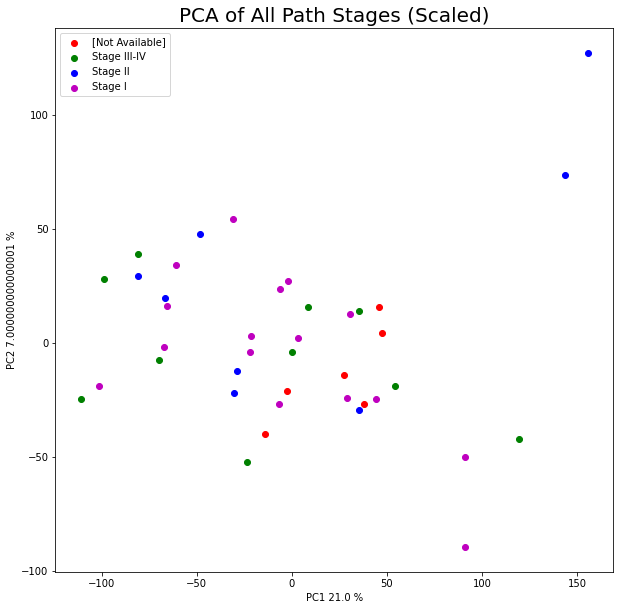

In [70]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))

for i in range(0, (xpca.shape[0]-1)): 
  if flabels[i] == '[Not Available]': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Stage IIIA' or flabels[i] == 'Stage III' or flabels[i] == 'Stage IV': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Stage II': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Stage I': 
    c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='m') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['[Not Available]', 'Stage III-IV', 'Stage II', 'Stage I']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100} %') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100} %') 
plt.title("PCA of All Path Stages (Scaled)", fontsize=20)
plt.show()

The whole thing is much messier than expected. As a precaution, and due to the small amount of data discarded, these individuals will be removed from the dataset.

In [117]:
dataTC = dataT.sort_values('Groups', axis = 0)
dataTC = dataTC[0:35]
dataTC


,Groups,0,1,2,3,4,5,6,7,8,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
TCGA_DD_A1EC_01A,Stage I,0.00,9.20,8.80,144.00,2545.0,0.0,253.0,0.0,0.0,...,54.0,1196.0,1635.0,2.0,2220.0,12725.0,4548.0,1494.0,8.0,1.0
TCGA_DD_A3A2_01A,Stage I,0.00,4.23,5.77,128.60,1635.0,0.0,214.0,0.0,0.0,...,29.0,623.0,751.0,23.0,2301.0,5560.0,1069.0,817.0,2.0,209.0
TCGA_DD_A1EI_01A,Stage I,0.00,0.00,12.00,181.74,2375.0,0.0,76.0,0.0,0.0,...,64.0,2167.0,2263.0,192.0,2377.0,12187.0,1949.0,1449.0,10.0,67.0
TCGA_DD_A1EG_01A,Stage I,0.00,10.34,2.66,383.12,2180.0,0.0,215.0,1.0,19.0,...,51.0,1481.0,1889.0,64.0,1069.0,16718.0,818.0,1024.0,21.0,302.0
TCGA_DD_A11D_01A,Stage I,0.00,2.26,3.74,69.86,762.0,0.0,36.0,0.0,0.0,...,31.0,315.0,723.0,21.0,1222.0,4185.0,316.0,358.0,2.0,74.0
TCGA_DD_A11C_01A,Stage I,0.00,11.18,10.82,167.17,1348.0,0.0,39.0,0.0,3.0,...,93.0,3202.0,2057.0,4.0,3657.0,4425.0,1175.0,1342.0,11.0,107.0
TCGA_DD_A11B_01A,Stage I,0.00,12.91,4.09,229.61,1975.0,0.0,73.0,0.0,0.0,...,51.0,627.0,1471.0,16.0,1533.0,4591.0,2312.0,877.0,5.0,150.0
TCGA_DD_A11A_01A,Stage I,1.00,0.00,26.00,170.17,2141.0,0.0,52.0,0.0,13.0,...,53.0,1646.0,2011.0,164.0,2518.0,7028.0,961.0,1822.0,13.0,45.0
TCGA_DD_A3A3_01A,Stage I,0.00,3.15,1.85,54.87,1069.0,0.0,113.0,0.0,0.0,...,11.0,212.0,627.0,7.0,554.0,2584.0,182.0,284.0,0.0,8.0
TCGA_BD_A3EP_01A,Stage I,0.00,4.57,3.43,191.92,1168.0,0.0,138.0,0.0,9.0,...,43.0,1063.0,1458.0,21.0,1051.0,8330.0,1263.0,873.0,4.0,100.0


The final modification I'll make to the data is to fuse all stages between III-IV into a single class. The reasoning is fairly straightforward: There is simply not enough data. Additionally, I'd expect the later stage patients to be more variable in their phenotype, meaning that more data would be needed to classify them either way.

In [118]:
dataTC['Groups'] [24:] = 'Stage III+'
dataTC

,Groups,0,1,2,3,4,5,6,7,8,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
TCGA_DD_A1EC_01A,Stage I,0.00,9.20,8.80,144.00,2545.0,0.0,253.0,0.0,0.0,...,54.0,1196.0,1635.0,2.0,2220.0,12725.0,4548.0,1494.0,8.0,1.0
TCGA_DD_A3A2_01A,Stage I,0.00,4.23,5.77,128.60,1635.0,0.0,214.0,0.0,0.0,...,29.0,623.0,751.0,23.0,2301.0,5560.0,1069.0,817.0,2.0,209.0
TCGA_DD_A1EI_01A,Stage I,0.00,0.00,12.00,181.74,2375.0,0.0,76.0,0.0,0.0,...,64.0,2167.0,2263.0,192.0,2377.0,12187.0,1949.0,1449.0,10.0,67.0
TCGA_DD_A1EG_01A,Stage I,0.00,10.34,2.66,383.12,2180.0,0.0,215.0,1.0,19.0,...,51.0,1481.0,1889.0,64.0,1069.0,16718.0,818.0,1024.0,21.0,302.0
TCGA_DD_A11D_01A,Stage I,0.00,2.26,3.74,69.86,762.0,0.0,36.0,0.0,0.0,...,31.0,315.0,723.0,21.0,1222.0,4185.0,316.0,358.0,2.0,74.0
TCGA_DD_A11C_01A,Stage I,0.00,11.18,10.82,167.17,1348.0,0.0,39.0,0.0,3.0,...,93.0,3202.0,2057.0,4.0,3657.0,4425.0,1175.0,1342.0,11.0,107.0
TCGA_DD_A11B_01A,Stage I,0.00,12.91,4.09,229.61,1975.0,0.0,73.0,0.0,0.0,...,51.0,627.0,1471.0,16.0,1533.0,4591.0,2312.0,877.0,5.0,150.0
TCGA_DD_A11A_01A,Stage I,1.00,0.00,26.00,170.17,2141.0,0.0,52.0,0.0,13.0,...,53.0,1646.0,2011.0,164.0,2518.0,7028.0,961.0,1822.0,13.0,45.0
TCGA_DD_A3A3_01A,Stage I,0.00,3.15,1.85,54.87,1069.0,0.0,113.0,0.0,0.0,...,11.0,212.0,627.0,7.0,554.0,2584.0,182.0,284.0,0.0,8.0
TCGA_BD_A3EP_01A,Stage I,0.00,4.57,3.43,191.92,1168.0,0.0,138.0,0.0,9.0,...,43.0,1063.0,1458.0,21.0,1051.0,8330.0,1263.0,873.0,4.0,100.0


Classification: Now to the actual task, the aim of this notebook is to attempt to classify the data in a few different ways. To achieve this aim in a non-exhaustive way, I'll apply first SVM and then Random Forest classification. The simplest and most direct way to test efficacy may be to create confusion matricies for each, and simply compare the two. The question remaining is whether to use the same test/train split for both. That is: What is they display peak accuracies at different split levels? Additionally, how does this feed into an argument against overfitting?


Features: It should also be useful to generate and display feature significance for both models. As the list of significant features are expected to differ between the two, we can then compare the two lists, and calculate a composite list of the features which are "actually"  most significant. That is: Features which both models recognize as useful. By using a number of different models, this seems like a viable tool to determine which genes warrant genuine interest, with regards to different disease types.

In [135]:
X = dataTC.iloc[:, 1:].values
y = dataTC.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)
str(classes)

"['Stage I' 'Stage II' 'Stage III+']"

In [136]:
#Most data processing steps have already been completed.
#So, what's left is mostly to import packages, and to organize things in such a way
#that minimizes the need to modify existing code.

#import standard classification tools from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.preprocessing import scale
import warnings

#import tools for ROC curves
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

#visualization
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

template = 'ggplot2'
test_size = 0.3

#prepare data
#features = data.iloc[1:, 0].values              #Unnecessary: 1. We already preserved the list of features in a previous cell
#data=data.drop(['ID'], axis = 1)                #             2. We already did that.     
#dataT = np.transpose(data)                      #             3. ""

#X is the data, y is the lables (classes)
X = dataTC.iloc[:, 1:].values                    #Substituting in the results of previous steps.
y = dataTC.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)

class_label= dataT[0]

X = scale(X, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

In [137]:
features

array(['a100130426', 'a100133144', 'a100134869', ..., 'ZZZ326009',
       'psiTPTE22387590', 'tAKR389932'], dtype=object)

In [138]:
X

array([[-0.1068422 , -0.10648881, -0.10650417, ..., -0.04945491,
        -0.1065349 , -0.10680378],
       [-0.05744085, -0.05733265, -0.05729326, ..., -0.03654296,
        -0.05738969, -0.05209488],
       [-0.07935684, -0.07935684, -0.07906458, ..., -0.04406675,
        -0.07911329, -0.07772507],
       ...,
       [-0.06056752, -0.06054133, -0.06049526, ..., -0.0379234 ,
        -0.06029185, -0.05861816],
       [-0.12919039, -0.12801217, -0.1286085 , ..., -0.03949457,
        -0.12876796, -0.12651501],
       [-0.08206537, -0.08200594, -0.08199199, ..., -0.06490058,
        -0.08193256, -0.07642124]])

In [139]:
y

array(['Stage I', 'Stage I', 'Stage I', 'Stage I', 'Stage I', 'Stage I',
       'Stage I', 'Stage I', 'Stage I', 'Stage I', 'Stage I', 'Stage I',
       'Stage I', 'Stage I', 'Stage I', 'Stage I', 'Stage II', 'Stage II',
       'Stage II', 'Stage II', 'Stage II', 'Stage II', 'Stage II',
       'Stage II', 'Stage III+', 'Stage III+', 'Stage III+', 'Stage III+',
       'Stage III+', 'Stage III+', 'Stage III+', 'Stage III+',
       'Stage III+', 'Stage III+', 'Stage III+'], dtype=object)

In [140]:
dataTC

,Groups,0,1,2,3,4,5,6,7,8,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,20530
TCGA_DD_A1EC_01A,Stage I,0.00,9.20,8.80,144.00,2545.00,0.00,253.00,0.00,0.00,...,54.00,1196.00,1635.00,2.00,2220.00,12725.00,4548.00,1494.00,8.00,1.00
TCGA_DD_A3A2_01A,Stage I,0.00,4.23,5.77,128.60,1635.00,0.00,214.00,0.00,0.00,...,29.00,623.00,751.00,23.00,2301.00,5560.00,1069.00,817.00,2.00,209.00
TCGA_DD_A1EI_01A,Stage I,0.00,0.00,12.00,181.74,2375.00,0.00,76.00,0.00,0.00,...,64.00,2167.00,2263.00,192.00,2377.00,12187.00,1949.00,1449.00,10.00,67.00
TCGA_DD_A1EG_01A,Stage I,0.00,10.34,2.66,383.12,2180.00,0.00,215.00,1.00,19.00,...,51.00,1481.00,1889.00,64.00,1069.00,16718.00,818.00,1024.00,21.00,302.00
TCGA_DD_A11D_01A,Stage I,0.00,2.26,3.74,69.86,762.00,0.00,36.00,0.00,0.00,...,31.00,315.00,723.00,21.00,1222.00,4185.00,316.00,358.00,2.00,74.00
TCGA_DD_A11C_01A,Stage I,0.00,11.18,10.82,167.17,1348.00,0.00,39.00,0.00,3.00,...,93.00,3202.00,2057.00,4.00,3657.00,4425.00,1175.00,1342.00,11.00,107.00
TCGA_DD_A11B_01A,Stage I,0.00,12.91,4.09,229.61,1975.00,0.00,73.00,0.00,0.00,...,51.00,627.00,1471.00,16.00,1533.00,4591.00,2312.00,877.00,5.00,150.00
TCGA_DD_A11A_01A,Stage I,1.00,0.00,26.00,170.17,2141.00,0.00,52.00,0.00,13.00,...,53.00,1646.00,2011.00,164.00,2518.00,7028.00,961.00,1822.00,13.00,45.00
TCGA_DD_A3A3_01A,Stage I,0.00,3.15,1.85,54.87,1069.00,0.00,113.00,0.00,0.00,...,11.00,212.00,627.00,7.00,554.00,2584.00,182.00,284.00,0.00,8.00
TCGA_BD_A3EP_01A,Stage I,0.00,4.57,3.43,191.92,1168.00,0.00,138.00,0.00,9.00,...,43.00,1063.00,1458.00,21.00,1051.00,8330.00,1263.00,873.00,4.00,100.00


1. Classification via Support Vector Machine (Lin. SVC)

In [141]:
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# there are several useful parameters such as:
# C - Regularization parameter. The strength of the regularization.
# kernel - Specifies the kernel type to be used in the algorithm
# we will use a linear kernel, it is the only kernel which allows us to use features selection
model = LinearSVC(C=1.0)
model.fit(X_train, y_train)

# after training we can predict labels for the test samples
predictions = model.predict(X_test)

c_matrix = confusion_matrix(y_test,predictions)
cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

In [142]:
CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

heat = go.Heatmap(z = CM_df, x=CM_df.index, 
                  y=CM_df.columns, 
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

Complete failure. This particularly poor result may be characteristic of trying to use SVM on this particular dataset. As seen in the above PCA, the data does not seem to group very well on its own, implying that perhaps linear classification would struggle to do anything useful with it. Based on these results, it does not seem useful to check which genes went into making these predictions, since the predictions themselves are so dissapointing.

This was done anyway, for reasons to be explained subsequently.

In [144]:
top_features_count = 20

# we use median of weights from all classes, you can also use np.sum(np.abs(model.coef_, axis=0))
vector_weights = np.median(model.coef_, axis=0)
top_positive_coefficients = np.argsort(vector_weights)[-top_features_count:]
top_negative_coefficients = np.argsort(vector_weights)[:top_features_count]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
top_features, top_features_weights = features[top_coefficients], vector_weights[top_coefficients]

d = {'Features':features[top_coefficients], 'Weight':vector_weights[top_coefficients]}
df_features = pd.DataFrame(d)

#plot feature significance
fig = px.bar(y=df_features.Features, x=df_features.Weight, template=template)
fig.update_layout(width=700, height=1000, template=template, title="Feature Significance")
fig.show()

In [171]:
#For use in comparison.
SVMfeatures = features[top_coefficients]
SVMfeaturesdf = df_features

2. Random Forest Classification

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#define Random forest model
model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=True)

#fit model on training data
model.fit(X_train, y_train)

#Predict test data
predictions = model.predict(X_test)
c_matrix = confusion_matrix(y_test,predictions)
#c_matrix = pd.DataFrame(c_matrix)

CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [150]:
heat = go.Heatmap(z = c_matrix, x=CM_df.index, 
                  y=CM_df.columns, 
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})
fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()

Also highly dissappointing.

In [151]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

RF_df = pd.DataFrame(forest_importances.sort_values(ascending=False))
RF_df.columns = ['Feature']

#plot feature significance
fig = px.bar(RF_df[0:20], template=template)
fig.update_layout(width=1000, height=700, template=template, title="Top 20 Features by Significance")
fig.show()

In [162]:
#For use in comparison.
RFfeaturesdf = RF_df = pd.DataFrame(forest_importances.sort_values(ascending=False))[0:20]
RFfeatures = RFfeaturesdf.index

3. Finally, the "shotgun" approach. Utilizing LazyPredict to get a sense of the overall field.

In [152]:
!pip uninstall scikit-learn -y -q
!pip install scikit-learn==0.24 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [153]:
import warnings
warnings.filterwarnings('ignore')

!pip install lazypredict -q

In [154]:
#import necessary modules
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor

#Load Breast cancer cell line data with different subtypes. Here, we label : Normal-like = 0, Basal = 1, Luminal = 3, Claudin-low = 3, since, to run package, we need labels as numeric values
data = dataTC

##Process data
#data=data.drop(['id'], axis = 1) 
#dataT = np.transpose(data)
#X = dataT.iloc[:, 1:].values
#y = dataT.iloc[:, 0].values

#Create a lazyClassifier model
model=LazyClassifier(verbose=0,predictions=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=0)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=model.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

100%|██████████| 29/29 [01:03<00:00,  2.19s/it]


In [134]:
fig = px.bar(models_c[['Time Taken', 'F1 Score','Accuracy']], barmode='group', template=template)
fig.update_layout(width=1200, height=700, template=template, title="Classification Report")
fig.show()

These results don't quite make sense, in that the accuracy values reported for the two classification models we've used seem to be unusually high. This seems to be mirrored in the original notebook from which the code is derived. The plot indicates that the two models we used are not particularly bad, as far as accuracy, even for this particular dataset. This is a useful result.

It implies that we should still get something useful by comparing the top predicting genes for the two plots. To comment: This may indicate a potential use for comparing a number of different models, none of which do a great job of classifying data. The models may help to point towards features which themeselves are more useful in drawing conclusions. In a way, the fact that agene is used strongly in *one* model does not make it interesting, but the fact that it features in a number of models serves as a form of correlation.

4. Checking for genes in common.

In [170]:
#Using a bit of borrowed code from the internet to get the intersection of the two lists.
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

print(intersection(SVMfeatures, RFfeatures))


[]


This result indicates that there are no genes in common between the two models. We'll leave it here, however there is a possible solution to the problem. Using the results from the lazyPredict program, it should be possible to generate a dataframe of gene names, juxtaposed with the number of models in which it made (eg. the top 20) in terms of significance. Thus, as the number of models checked increases, the ability to recognize potentially useful genes for predicting risk factors should increase. Here, my list of potentially interesting marker genes is simply the top 3 from each model.

SVM:

1. APOC1341
2. ORM15004
3. APOH350

Random Forest:

1. H3F3A3020
2. DDAH223564
3. PLIN4729359

